# Analyzing output from results of CUDA benchmarks

## Using old output reading
* 0 - Mem total 
* 2 - Mem used
* 4 - Mem Free
* 6 - Power Drawed
* 8 - Clocks

## Using new output reading
* 0 - memory total 
* 1 - memory used 
* 2 - memory free 
* 3 - power drawed 
* 4- clocks 

In [1]:
#importing necessary libraries
import csv
import numpy as np
import os
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import pylab
import plotly.graph_objs as go
import pandas as pd

In [2]:
#Loading data
all_rates = glob.glob("combined_results_2/*.rate")
all_results = glob.glob("combined_results_2/*.results")


In [3]:
#print (all_rates)

In [4]:
def splitting_data(f):
    lines = f.readlines()
    results = []
    for x in lines:
        results.append(x.split(None))
    f.close()
    return results


In [5]:
def average_results(f):
    #f = open("combined.n6200000b128.results","r")
    next(f)
    results = np.array(splitting_data(f))
    data_dic = {}
    #data_dic = []
    data_size = len(results)
    for col in range (5):
        total = 0
        for y in enumerate(results):
            #print(y)
            total += float(y[1][col])
        average = total/data_size

        data_dic[col] = (average)

    #print (data_dic[2])
    return (data_dic)

In [6]:
def rate_data(f):
    #files = glob.glob("*.rate")
    #f = open("combined.n1000b512.rate","r")
    results = np.array(splitting_data(f))
    #print(results)
    all_4 = results[4:]
    #print (all_4)
    rates = 0
    time = 0
    for i in all_4:
        rates += float(i[1])
        time += float(i[2])
    average_rate = (rates/4)
    average_time = (time/4)
    #print (average_rate, average_time)
    return average_rate, average_time


In [7]:
def rate_one(file):
    #file_rate = glob.glob("*.rate")
    rate_all_data = {"average rate": [ ], "average time":[ ]}
    f = open(file,"r")
    average_rate, average_time = rate_data(f)
    rate_all_data["average time"].append(average_time)
    rate_all_data["average rate"].append(average_rate)
    #print (rate_all_data)
    return rate_all_data


In [8]:
def results_one(files):
    #files = glob.glob("*.results")
    num = len(files)
    all_data = defaultdict(list)
    averages = {}
    f = open(files,"r")
    averages = average_results(f)
    #print("these are the averages: \n")
    #print (averages)
    for k,v in averages.items():
        all_data[k].append(v)
    return all_data

In [9]:
def spec_file(all_files,all_results):
    block_sizes = [128,256,512,1024]
    array_sizes = [10000,1000,100]
    all_data = {}
    rate_all= {}
    array_range = []
    for f in all_files:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range.append(j)
                rate_all[f] = rate_one(f)["average time"]
    ##TODO: be able to do rate and results at the same time, want to plot power against average time
    array_range_res = []
    for f in all_results:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range_res.append(j)
                all_data[f] = results_one(f)[3] #3 is power

    return all_data,rate_all

In [10]:
results_organized, rates_organized = spec_file(all_rates, all_results)

In [11]:
def array_file(all_files,all_results,results_col):
    block_sizes = [128,256,512,1024]
    #array_sizes = [10000,1000,100]
    all_data = {}
    rate_all= {}
    asize_data = {}
    array_range = []
    for f in all_files:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range.append(j)
                rate_all[f] = rate_one(f)["average rate"]
                asize_data[f] = j 
    ##TODO: be able to do rate and results at the same time, want to plot power against average time
    array_range_res = []
    for f in all_results:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range_res.append(j)
                all_data[f] = results_one(f)[results_col] #3 is power, 4 is clocks
    return all_data,rate_all,asize_data

results_organized, rates_organized, asize_organized = array_file(all_rates, all_results,3)

In [12]:
def array_time(all_files,all_results,results_col):
    block_sizes = [128,256,512,1024]
    #array_sizes = [10000,1000,100]
    all_data = {}
    rate_all= {}
    asize_data = {}
    array_range = []
    for f in all_files:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range.append(j)
                rate_all[f] = rate_one(f)["average time"]
                asize_data[f] = j 
    ##TODO: be able to do rate and results at the same time, want to plot power against average time
    array_range_res = []
    for f in all_results:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range_res.append(j)
                all_data[f] = results_one(f)[results_col] #3 is power, 4 is clocks
    return all_data,rate_all,asize_data

results_Torganized, times_organized, asize_Torganized = array_time(all_rates, all_results,3)

### results-contains average power, rate-contains average time

In [13]:
def by_block(dic_data):
    block_sizes = {"128": [ ],"256":[ ],"512":[ ],"1024":[ ]}
    bits_128 = []
    bits_256 = []
    bits_512 = []
    bits_1024 = []
    results_combined = {"128": bits_128,"256":bits_256,"512":bits_512,"1024":bits_1024}

    example= "this is 128"
    for k,v in block_sizes.items():
        for key,val in dic_data.items():
            if k in key:
                results_combined[k].append(val)
    return results_combined
    
            

In [14]:
block_power = by_block(results_organized)
block_rate = by_block(rates_organized)
block_asize = by_block(asize_organized)
#plt.scatter(results_organized.values(),bits_128)

In [15]:
print (len(block_power['128']))
print (len(block_rate['128']))
print (len(block_rate['128']))
print (len(block_rate['1024']))
print (len(block_asize['1024']))


630
630
630
630
630


In [16]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font) 

In [17]:
# Create plot-rate vs power
def rate_power(block_power, block_rate):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)

    blocks = ("128", "256", "512", "1024")
    colors = ("red", "green", "blue", "black")

    for block, color in zip(blocks, colors):
        ax.scatter(block_power[block], block_rate[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)

    ax.set_xlabel("Power (Watts)")
    ax.set_ylabel("Rate (MB/s)")
    #ax.set_xlim([80,None]) 
    #ax.set_ylim([0.0,0.00075])    
    plt.title('STREAM (CUDA) Performance Results')
    plt.legend(loc=2)
    plt.show()

/home/yzamora/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



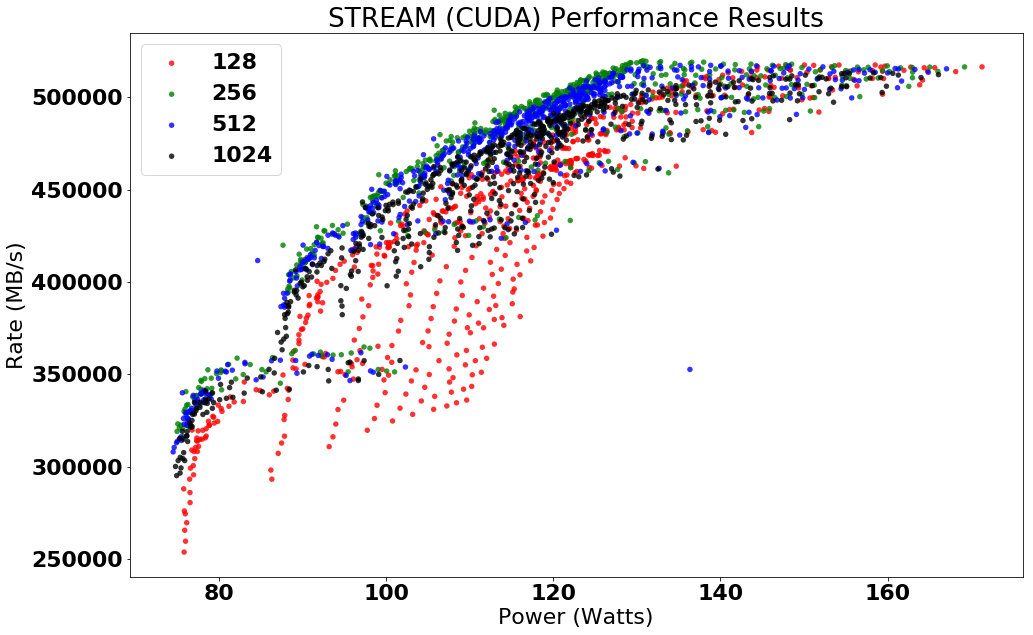

In [18]:
rate_power(block_power,block_rate)

In [19]:
# Create plot- array size vs rate
def array_rate(block_rate,block_asize):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)

    blocks = ("128", "256", "512", "1024")
    colors = ("red", "green", "blue", "black")

    for block, color in zip(blocks, colors):
        new = []
        for v in block_asize[block]:
            new.append(v / int(block))
        #ax.scatter(block_rate[block], block_asize[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)
        ax.scatter(new,block_rate[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)

    ax.set_ylabel("Rate (MB/s)")
    ax.set_xlabel("Array size / Block size")
    #ax.set_xlim([80,None]) 
    #ax.set_ylim([0.0,0.00075])    
    ax.set_yscale('log')
    plt.title('STREAM (CUDA) Performance Results')
    plt.legend(loc=2)
    plt.show()

/home/yzamora/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



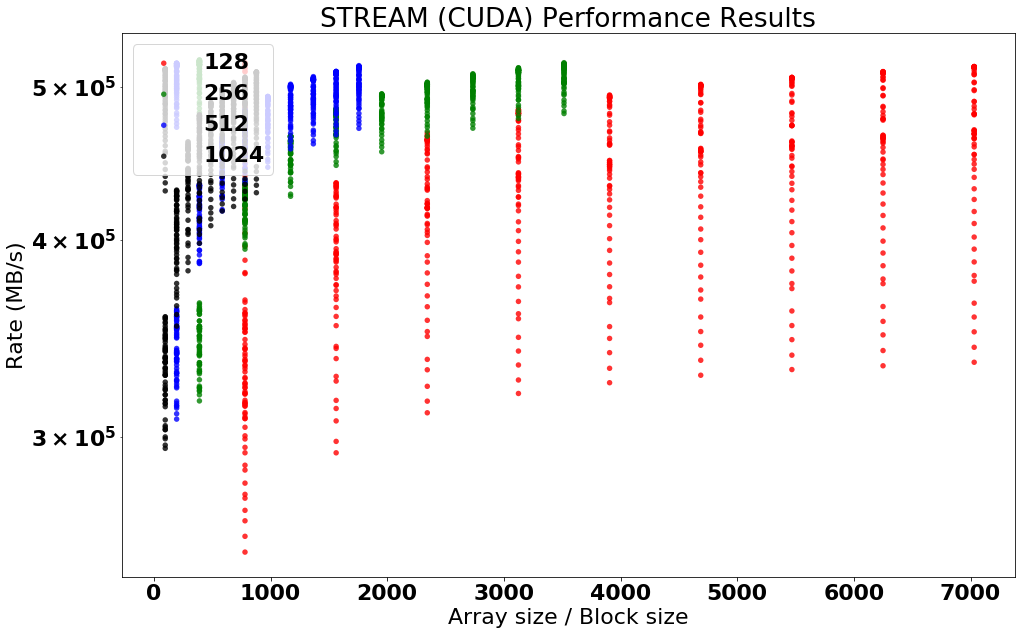

In [20]:
array_rate(block_rate,block_asize)

In [21]:
# Create plot - array size vs power
def array_power(block_asize,block_power):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)

    blocks = ("128", "256", "512", "1024")
    colors = ("red", "green", "blue", "black")

    for block, color in zip(blocks, colors):
        ax.scatter(block_asize[block], block_power[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)


    ax.set_ylabel("Power (Watts)")
    ax.set_xlabel("Array size")
    #ax.set_xlim([80,None]) 
    #ax.set_ylim([0.0,0.00075])

    plt.title('STREAM (CUDA) Performance Results')
    plt.legend(loc=2)
    plt.show()

/home/yzamora/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



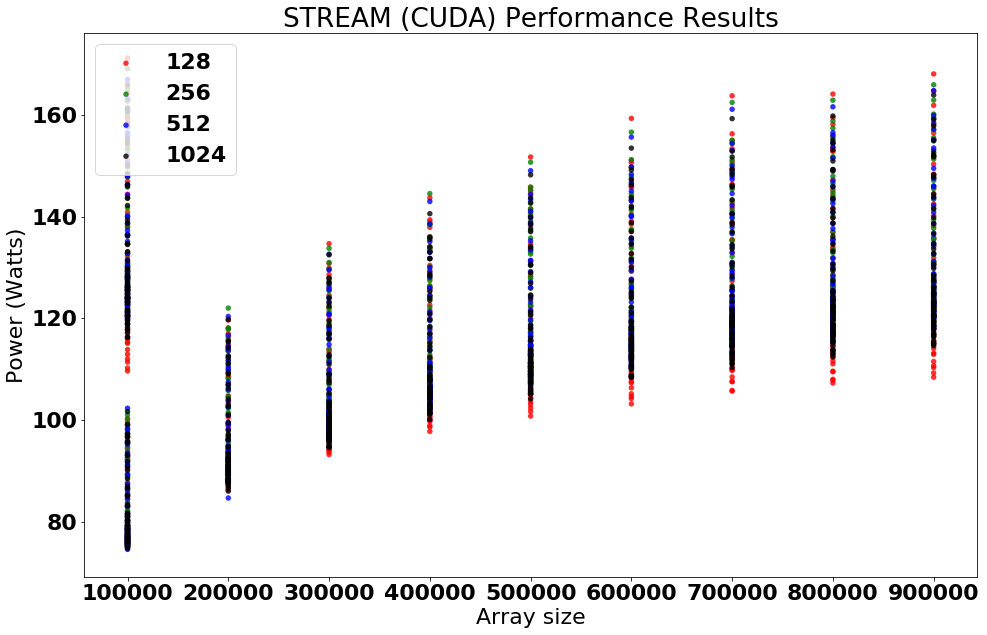

In [22]:
array_power(block_asize,block_power)

In [23]:
results_clocks, rates_clocks, asize_clocks = array_file(all_rates, all_results,4) #4 is clocks


In [24]:
block_clocks = by_block(results_clocks)
block_rate = by_block(rates_clocks)
block_asize = by_block(asize_clocks)

In [25]:
print(results_clocks)

{'combined_results_2/combined.n1000000b128c1328.results': [1026.8398791540785], 'combined_results_2/combined.n1000000b256c1328.results': [1328.0], 'combined_results_2/combined.n1000000b512c1328.results': [1328.0], 'combined_results_2/combined.n1000000b1024c1328.results': [1328.0], 'combined_results_2/combined.n2000000b128c1328.results': [1328.0], 'combined_results_2/combined.n2000000b256c1328.results': [1328.0], 'combined_results_2/combined.n2000000b512c1328.results': [1328.0], 'combined_results_2/combined.n2000000b1024c1328.results': [1328.0], 'combined_results_2/combined.n3000000b128c1328.results': [1328.0], 'combined_results_2/combined.n3000000b256c1328.results': [1328.0], 'combined_results_2/combined.n3000000b512c1328.results': [1328.0], 'combined_results_2/combined.n3000000b1024c1328.results': [1328.0], 'combined_results_2/combined.n4000000b128c1328.results': [1328.0], 'combined_results_2/combined.n4000000b256c1328.results': [1328.0], 'combined_results_2/combined.n4000000b512c1328

In [26]:
#print(results_clocks)
unique_clocks = []
for k,v in results_clocks.items():
    if 715 == v:
        print("hello")
    if v not in unique_clocks:
        unique_clocks.append(v)
print(unique_clocks)

[[1026.8398791540785], [1328.0], [1316.6144578313254], [1316.0], [1303.6943620178042], [1303.0], [1290.6636636636636], [1290.0], [1278.6163141993957], [1278.0], [1265.735119047619], [1265.0], [1252.657738095238], [1252.0], [1240.6126126126126], [1240.0], [1227.6616766467066], [1227.0], [1215.5731343283583], [1215.0], [1202.6985074626866], [1202.0], [1189.64], [1189.0], [1177.6], [1177.0], [1164.578635014837], [1164.0], [1151.608187134503], [1151.0], [1139.603550295858], [1139.0], [1126.6538461538462], [1126.0], [1113.6538461538462], [1113.0], [1101.6297376093294], [1101.0], [1088.6538461538462], [1088.0], [1075.6424418604652], [1075.0], [1063.6279069767443], [1063.0], [1050.6424418604652], [1050.0], [1037.6046511627908], [1037.0], [1025.591304347826], [1025.0], [1012.6519174041298], [1012.0], [999.6028985507246], [999.0], [987.657060518732], [987.0], [974.65], [974.0], [961.6424418604652], [961.0], [949.5828571428572], [949.0], [936.6332378223495], [936.0], [923.6155988857938], [923.0]

In [27]:
# Create plot-clock vs power
def clock_power(block_power, block_clocks):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)

    blocks = ("128", "256", "512", "1024")
    colors = ("red", "green", "blue", "black")

    for block, color in zip(blocks, colors):
        ax.scatter(block_clocks[block], block_power[block],alpha=0.8, c=color, edgecolors='none', s=30, label=block)

    ax.set_ylabel("Power (Watts)")
    ax.set_xlabel("Clock (MHz)")
    #ax.set_xlim([80,None]) 
    #ax.set_ylim([0.0,0.00075])    
    plt.title('STREAM (CUDA) Performance Results')
    plt.legend(loc=2)
    plt.show()
    
# Create plot-clock vs rate
def clock_rate(block_rate, block_clocks):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)

    blocks = ("128", "256", "512", "1024")
    colors = ("red", "green", "blue", "black")

    for block, color in zip(blocks, colors):
        ax.scatter(block_clocks[block],block_rate[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)

    ax.set_ylabel("Rate (MB/s)")
    ax.set_xlabel("Clock (MHz)")
    #ax.set_xlim([80,None]) 
    #ax.set_ylim([0.0,0.00075])    
    plt.title('STREAM (CUDA) Performance Results')
    plt.legend(loc=2)
    plt.show()

/home/yzamora/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



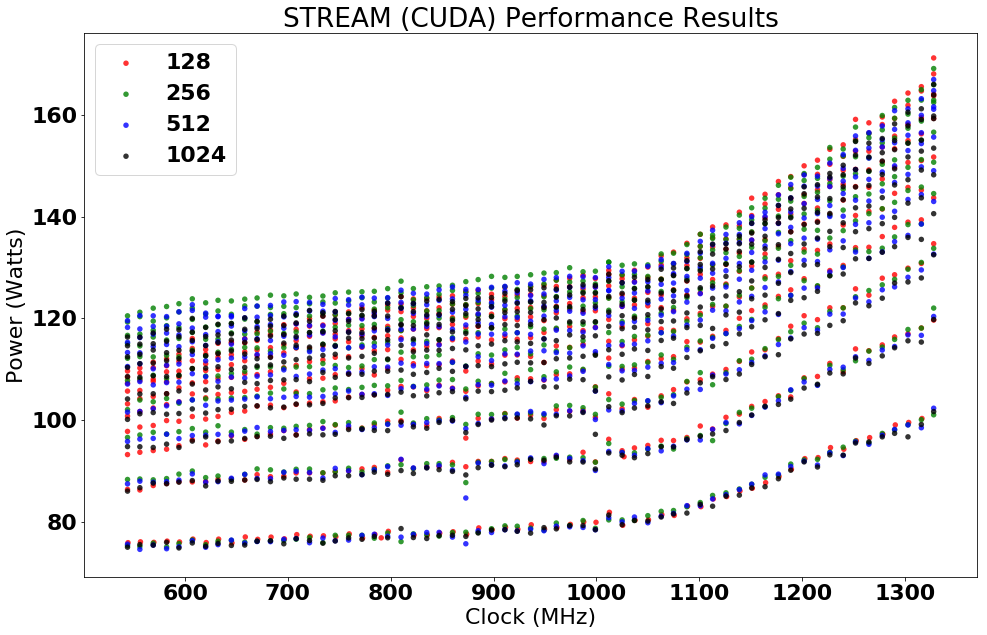

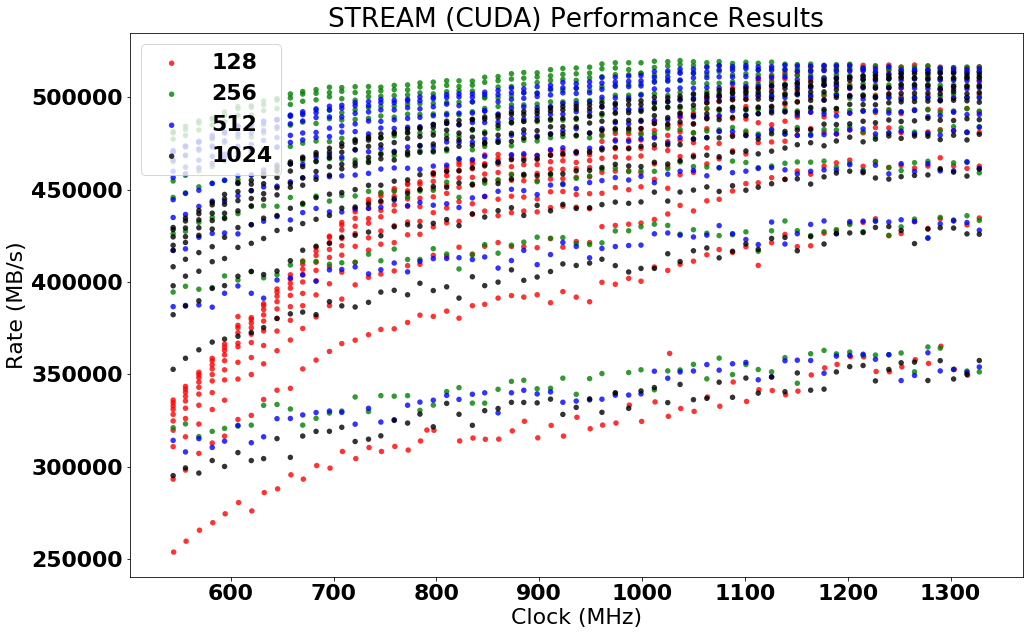

In [28]:
clock_power(block_power, block_clocks)
clock_rate(block_rate,block_clocks)

In [29]:
def int_find(block_rate):
    #if rate is above 35000, get array size and plot against clock speed
    big_rates = []
    for r in block_rate:
        if (r[0] > 350000):
            big_rates.append(r[0])
    return big_rates

In [30]:
big_rates = int_find(block_rate["128"])
print (len(big_rates))
#print(block_clocks)

538


In [31]:
# Create plot-clock vs rate
def big_rate(block_rate, block_clocks):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)

    blocks = ("128", "256", "512", "1024")
    colors = ("red", "green", "blue", "black")

    
    ax.scatter(block_clocks,block_rate, alpha=0.8,c="red", edgecolors='none', s=30, label="128")

    ax.set_ylabel("Rate (MB/s)")
    ax.set_xlabel("Clock (MHz)")
    #ax.set_xlim([80,None]) 
    #ax.set_ylim([0.0,0.00075])    
    plt.title('STREAM (CUDA) Performance Results')
    plt.legend(loc=2)
    plt.show()

In [32]:
#big_rate(big_rates,block_clocks["128"])

/home/yzamora/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



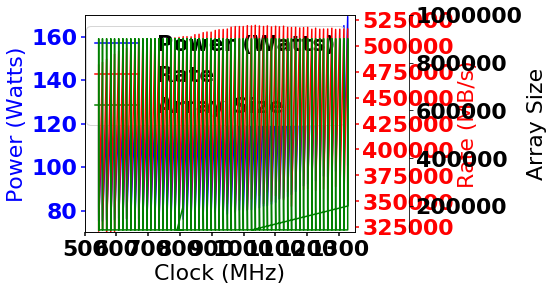

In [33]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

        

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx() ##commented out for get rid of far right spine

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(block_clocks["256"], block_power["256"], "b-", label="Power (Watts)")
p2, = par1.plot(block_clocks["256"], block_rate["256"], "r-", label="Rate")
p3, = par2.plot(block_clocks["128"], block_asize["128"], "g-", label="Array Size")

host.set_xlim(500, 1350)
host.set_ylim(70, 170)
par1.set_ylim(320000, 530000)
par2.set_ylim(90000, 1000000)

host.set_xlabel("Clock (MHz)")
host.set_ylabel("Power (Watts)")
par1.set_ylabel("Rate (MB/s)")
par2.set_ylabel("Array Size")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
#par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
plt.style.use('ggplot')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.show()